# Exam Data Science 1 (2021 - 2022)

## General Information

Data source:
https://archive.ics.uci.edu/ml/datasets/student%2Bperformance

In [142]:
from IPython import display

#### ***Personal Information***

First name: Njau

Last name: Moses

Student number: r0853097

In regards to the image, i could not paste a screenshot, therefore i decided to save it in the same directory as this .ipynb. It is under the group_nums: "Your groups are: 2 and 6"

#### ***Imports***

In [143]:
# put all your library imports here
import numpy as np
from random import randrange
from sklearn import datasets
import matplotlib.pyplot as plt
from matplotlib.pyplot import plot
import seaborn as sns#; sns.set()
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import make_blobs
from sklearn.metrics import classification_report
from sklearn import datasets, svm, metrics
import pandas as pd
from pandas.plotting import scatter_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as smf
from statsmodels.graphics.factorplots import interaction_plot
from sklearn.cluster import KMeans
from sklearn.metrics import r2_score

#### ***Data Assignment***

You need only use a selection of the original dataset. The variables have been grouped into several groups. You will use the *Basic* Group along with 2 other groups to predict G3.
Each group has been given a number.

The following script will assign you the numbers of the groups you will need to use in the assignment. Replace my personel number with your student number, and run the script **once**. After you have run the script, paste a screenshot below. This is of utmost importance, as the data assignment script uses random numbers.

Attribute Information:

#### Attributes for both (Portuguese language course) datasets:
1 school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
2 sex - student's sex (binary: 'F' - female or 'M' - male)
3 age - student's age (numeric: from 15 to 22)
4 address - student's home address type (binary: 'U' - urban or 'R' - rural)
5 famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
11 reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
26 goout - going out with friends (numeric: from 1 - very low to 5 - very high)
27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
#### these grades are related with the course subject, Math or Portuguese:
31 G1 - first period grade (numeric: from 0 to 20)
31 G2 - second period grade (numeric: from 0 to 20)
32 G3 - final grade (numeric: from 0 to 20, output target)


Variable to predict:
+ G3

Basic:
+ school
+ sex
+ age
+ address
+ famsize

[1] Parents:
+ Medu
+ Fedu
+ Mjob
+ Fjob

[2] Surrounding: 
+ reason
+ nursery
+ internet

[3] Extra:
+ freetime
+ guardian
+ traveltime
+ studytime
+ failures

[4] Support:
+ schoolsup
+ famsup
+ paid

[5] Extra curricular:
+ activities
+ higher
+ romantic
+ famrel

[6] Relaxation:
+ goout
+ Dalc
+ Walc

[7] Health:
+ health
+ absences


In [144]:
studentnumber = "r0853097"

def stdnr_splitter(studentnumber):
	# decompose student number into interesting 
	cons_array = np.array(list(studentnumber))[2:].astype(int)
	indices = np.unique(cons_array)
	sum = round(np.sum(cons_array)/6)+1
	random = randrange(7)+1
	# interaction terms
	var1_index = int(round((sum*random)/7)+1)
	# quadratic terms
	var2a_index = int(round((sum/random)))
	var2b_index = int(round((randrange(10)+1)%var2a_index))
	print(f"Your groups are: {var1_index} and {var2a_index}")

stdnr_splitter(studentnumber)

Your groups are: 2 and 6


<!-- Uncomment this, and use the code below to paste your screenshot.
     Make absolutely sure you upload this screenshot, in the provided folder structure in your upload!
![data assignment screenshot](path/to/screenshot.png "Data Assignment")
-->

## Assignment

### Question 1: General

Welcome to the Data Science Fundamentals exam!

#### Question 1a

In this take-home exam, you will try and apply everything you have learned this semester to 1 dataset. The dataset you will be working with, is . As very first assignment, you load in the dataset here, and divide it over 2 dataframes: *X_df* and *Y_df*. The former should contain all the independent variables present in the dataset, while the latter contains all the dependent variables. 
Do so here:


In [145]:
# import data and divide over dataframes
df = pd.read_csv("student.csv")
df.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,nursery,internet,guardian.x,traveltime.x,studytime.x,failures.x,schoolsup.x,famsup.x,paid.x,activities.x,higher.x,romantic.x,famrel.x,freetime.x,goout.x,Dalc.x,Walc.x,health.x,absences.x,G1.x,G2.x,G3.x,guardian.y,traveltime.y,studytime.y,failures.y,schoolsup.y,famsup.y,paid.y,activities.y,higher.y,romantic.y,famrel.y,freetime.y,goout.y,Dalc.y,Walc.y,health.y,absences.y,G1.y,G2.y,G3.y
0,GP,F,15,R,GT3,T,1,1,at_home,other,home,yes,yes,mother,2,4,1,yes,yes,yes,yes,yes,no,3,1,2,1,1,1,2,7,10,10,mother,2,4,0,yes,yes,yes,yes,yes,no,3,1,2,1,1,1,4,13,13,13
1,GP,F,15,R,GT3,T,1,1,other,other,reputation,no,yes,mother,1,2,2,yes,yes,no,no,yes,yes,3,3,4,2,4,5,2,8,6,5,mother,1,2,0,yes,yes,no,no,yes,yes,3,3,4,2,4,5,2,13,11,11
2,GP,F,15,R,GT3,T,2,2,at_home,other,reputation,yes,no,mother,1,1,0,yes,yes,yes,yes,yes,no,4,3,1,1,1,2,8,14,13,13,mother,1,1,0,yes,yes,no,yes,yes,no,4,3,1,1,1,2,8,14,13,12
3,GP,F,15,R,GT3,T,2,4,services,health,course,yes,yes,mother,1,3,0,yes,yes,yes,yes,yes,no,4,3,2,1,1,5,2,10,9,8,mother,1,3,0,yes,yes,no,yes,yes,no,4,3,2,1,1,5,2,10,11,10
4,GP,F,15,R,GT3,T,3,3,services,services,reputation,yes,yes,other,2,3,2,no,yes,yes,yes,yes,yes,4,2,1,2,3,3,8,10,10,10,other,2,3,0,no,yes,yes,yes,yes,yes,4,2,1,2,3,3,2,13,13,13
5,GP,F,15,R,GT3,T,3,4,services,health,course,yes,yes,mother,1,3,0,yes,yes,yes,yes,yes,no,4,3,2,1,1,5,2,12,12,11,mother,1,3,0,yes,yes,no,yes,yes,no,4,3,2,1,1,5,2,11,12,12
6,GP,F,15,R,GT3,T,3,4,services,teacher,course,yes,yes,father,2,3,2,no,yes,no,no,yes,yes,4,2,2,2,2,5,0,12,0,0,father,2,3,0,no,yes,no,no,yes,yes,4,2,2,2,2,5,0,10,11,12
7,GP,F,15,R,LE3,T,2,2,health,services,reputation,yes,yes,mother,2,2,0,yes,yes,yes,no,yes,no,4,1,3,1,3,4,2,8,9,8,mother,2,2,0,yes,yes,no,no,yes,no,4,1,3,1,3,4,0,11,10,11
8,GP,F,15,R,LE3,T,3,1,other,other,reputation,no,yes,father,2,4,0,no,yes,no,no,yes,no,4,4,2,2,3,3,12,16,16,16,father,2,4,0,no,yes,no,no,yes,no,4,4,2,2,3,3,6,15,15,15
9,GP,F,15,U,GT3,A,3,3,other,health,reputation,yes,no,father,1,4,0,yes,no,no,no,yes,no,4,3,3,1,1,4,10,10,11,11,father,1,4,0,yes,no,no,no,yes,no,4,3,3,1,1,4,10,10,10,10


In [146]:
"""
Basic:
school, sex, age, address, famsize
[2] Surrounding:
reason, nursery, internet
[6] Relaxation:
goout, Dalc, Walc
"""
def select_columns(data_frame, column_names):
	new_frame = data_frame.loc[:, column_names]
	return new_frame
selected_columns =  ["school","sex","age","address","famsize","reason","nursery","internet","goout.x","goout.y","Dalc.x","Dalc.y","Walc.x","Walc.y","G1.x","G2.x","G3.x","G1.y","G2.y","G3.y"]
df = select_columns(df, selected_columns)
df

,school,sex,age,address,famsize,reason,nursery,internet,goout.x,goout.y,Dalc.x,Dalc.y,Walc.x,Walc.y,G1.x,G2.x,G3.x,G1.y,G2.y,G3.y
0,GP,F,15,R,GT3,home,yes,yes,2,2,1,1,1,1,7,10,10,13,13,13
1,GP,F,15,R,GT3,reputation,no,yes,4,4,2,2,4,4,8,6,5,13,11,11
2,GP,F,15,R,GT3,reputation,yes,no,1,1,1,1,1,1,14,13,13,14,13,12
3,GP,F,15,R,GT3,course,yes,yes,2,2,1,1,1,1,10,9,8,10,11,10
4,GP,F,15,R,GT3,reputation,yes,yes,1,1,2,2,3,3,10,10,10,13,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377,MS,M,18,U,LE3,course,yes,yes,3,3,2,2,3,3,8,7,8,9,10,9
378,MS,M,18,U,LE3,other,yes,yes,2,2,2,2,2,2,13,13,13,15,16,16
379,MS,M,19,R,GT3,home,yes,yes,4,4,3,3,3,3,8,8,8,8,9,10
380,MS,M,19,R,GT3,home,yes,yes,4,4,3,3,3,3,8,7,8,10,9,11


In [147]:
# Data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382 entries, 0 to 381
Data columns (total 20 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   school    382 non-null    object
 1   sex       382 non-null    object
 2   age       382 non-null    int64 
 3   address   382 non-null    object
 4   famsize   382 non-null    object
 5   reason    382 non-null    object
 6   nursery   382 non-null    object
 7   internet  382 non-null    object
 8   goout.x   382 non-null    int64 
 9   goout.y   382 non-null    int64 
 10  Dalc.x    382 non-null    int64 
 11  Dalc.y    382 non-null    int64 
 12  Walc.x    382 non-null    int64 
 13  Walc.y    382 non-null    int64 
 14  G1.x      382 non-null    int64 
 15  G2.x      382 non-null    int64 
 16  G3.x      382 non-null    int64 
 17  G1.y      382 non-null    int64 
 18  G2.y      382 non-null    int64 
 19  G3.y      382 non-null    int64 
dtypes: int64(13), object(7)
memory usage: 59.8+ KB


Our target in this case is G3 or Final Grade, and from description each variable above, there are 2 parameters that have strong and direct correlation with G3, namely G1 ang G2. And because of that, this situation could bias our model later, so we need to remove G1 and G2. Since the values of some of the x and y named are the same, we can remove them too.

In [148]:
#split the dataset into 2 dataframes: X_df and Y_df. The former should contain all the independent variables present in the dataset, while the latter contains all the dependent variables.

x_data = ["school","sex","age","address","famsize","reason","nursery","internet","goout.x","Dalc.x","Walc.x"]
X_df = select_columns(df, x_data)
y_data = ["G3.x","G3.y"]
Y_df = select_columns(df, y_data)

In order to split the data into independent and dependent variables, it lies on the question of what variable is dependent on the other. When you look at the attributes, they represent the individual attributes or so as to speak independent conditions that don't lie in the choice of the student.
However the performance of the student relies on his environment and conditions. In this case,  the attributes provided by the data set, making the performance dependent on the said attributes.

#### Question 1b

**You are not permitted to use all variables in your analysis**.
Using the *Data Assignment* script above, you will receive the variables you are allowed to use.
Before you go any further, you should take a look at the variables that have been assigned to you. For these variables, you will add 1 quadratic term and 1 interaction term.

A Quadratic Term is a transformation of an existing variable. Let's say I have variable $x$ in my dataset, the quadratic term would then be $x^2$. Make the quadratic term that is asked from you by the *Data Assignment* script, and add it to the dataframe containing your independent variables. Note: when you add a quadratic term of a variable which is not yet in your dataframe, you also need to add the underlying variable to your dataframe! Otherwise, your analyses will not make any sense.

An Interaction Term is the multiplication of two existing terms. Let's say I have variables $x$ and $y$ in my dataset, the interaction term would then be $x*y$. Note: the same remark as with the quadratic term holds. The original terms also need to be present in your dataframe. If they are not in there yet, please add them!


Make a new dataframe, called *X_df_complete* in which you select the relevant dependent variables and add the Quadratic and Interaction Term. Do so here:

In [149]:
# make complete dataframe
#quadratic terms
X_df["WalcQuadTerm"] = X_df["Walc.x"] * X_df["Walc.x"]
#interaction term
X_df["goOutDalcInterTerm"] = X_df["goout.x"] * X_df["Walc.x"]
newDataSet = ["Walc.x", "Dalc.x", "goout.x","WalcQuadTerm","goOutDalcInterTerm"]
X_df_complete = select_columns(X_df, newDataSet)
grade1 = Y_df["G3.x"]
grade2 = Y_df["G3.y"]
Y_df["G3"] = (grade2 + grade1)/2
grade = Y_df["G3"].round().astype('int64')
X_df_complete = pd.concat([X_df_complete,grade], axis = 1)
X_df_complete.head(5)

,Walc.x,Dalc.x,goout.x,WalcQuadTerm,goOutDalcInterTerm,G3
0,1,1,2,1,2,12
1,4,2,4,16,16,8
2,1,1,1,1,1,12
3,1,1,2,1,2,9
4,3,2,1,9,3,12


In [150]:
max_value_column = X_df_complete["G3"].max()
print(max_value_column)

18


#### Question 1c

What does the Interaction Term and the Quadratic Term signify? Investigate, illustrate with graphs, and report below:

Our goal is to explore how the going out are related to the students performance.  Additionally, we are interested to know how drinking alcohol on  weekdays affects the relationship between going out and the performance.

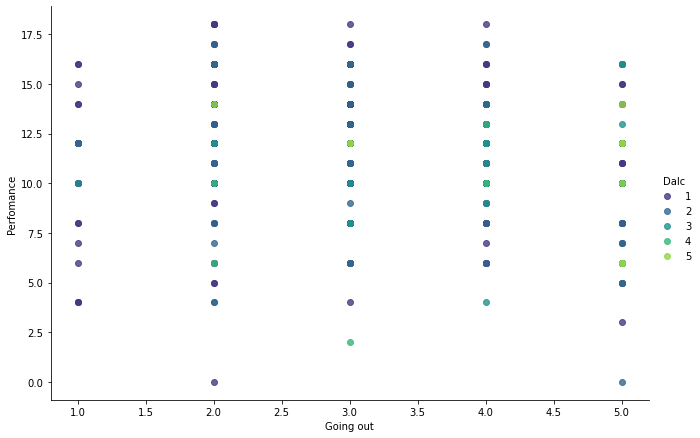

In [151]:
X_df_complete = X_df_complete.rename(columns={"goout.x": "goout", "Dalc.x": "Dalc"})
x =X_df_complete["goout"]
x2 = X_df_complete["Dalc"]
y = X_df_complete["G3"]

sns.lmplot(x='goout', y='G3',hue = "Dalc", data=X_df_complete, fit_reg=False, palette='viridis', height=6, aspect=1.5)
plt.ylabel("Perfomance")
plt.xlabel("Going out");

This dataset shows a number of parameters for different performances. The goal is to predict performance (G3) and the underlying effects of going out (goout.x) and drinking on weekdays (dalc.x). That is, we wish to regress G3 on goout and dalc.

In a regression equation, an interaction effect is represented as the product of two or more independent variables.

#### Building the Regression Model

First, let’s ignore the interaction term. When we regress dose and gender against anxiety, we get the following regression table.

In [152]:
model = smf.ols(formula='G3 ~ goout + Dalc', data = X_df_complete).fit()
summary = model.summary()
summary.tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,13.0449,0.516,25.274,0.000,12.030,14.060
goout,-0.2860,0.153,-1.868,0.062,-0.587,0.015
Dalc,-0.4726,0.196,-2.417,0.016,-0.857,-0.088


The resulting model is written as:

G3 = β0 + β1 ⋅ goout + β2 ⋅ dalc

The coefficients of the model can be read as follows:

For every 1 unit increase in going out , performance decreases by 0.28 (holding Dalc constant)
For every 1 unit increase in drinking alcohol on weekdays, performance decreases by 0.47 (holding goout constant)
At 0 weight and 0 cylinders, we expect performace to be 13

In [153]:
print(model.rsquared_adj)

0.026917928451858808


Finally, this model has an adjusted R2 of 0.026 - we will look to improve this with an interaction term.

#### Modeling the Interaction between going out and drinking alcohol on weekdays

By claiming there may be an interaction between going out and drinking on weekdays, we are saying that we believe the relationship between the going out and the perfomance is different for drinking on weekdays.

In [154]:
model_interaction  = smf.ols(formula='G3 ~ goout + Dalc + goout:Dalc', data = X_df_complete).fit()
summary = model_interaction .summary()
summary.tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,13.6653,0.987,13.852,0.000,11.726,15.605
goout,-0.4616,0.283,-1.631,0.104,-1.018,0.095
Dalc,-0.9124,0.627,-1.455,0.146,-2.145,0.321
goout:Dalc,0.1185,0.160,0.738,0.461,-0.197,0.434


In contrast to the previous formulation, our new formulation is:

G3 = β0 + β1 * goout + β2 * dalc + B3 * goout * dalc



In [155]:
print(model_interaction.rsquared_adj)

0.025748165752039198


The adjusted R2 of our model is 0.025 remains the same. We also see that the coefficients on both going out and dalc have changed, but remain insignificant, and the interaction term (which is the same as gout * dalc) is insignificant. This is evidence that there is an interaction between the variables

#### Visualizing Interacting Terms

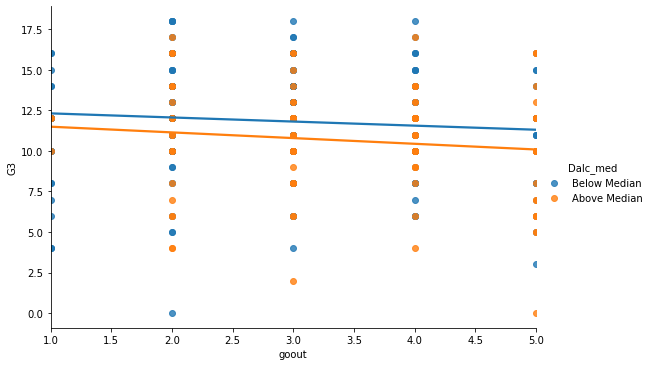

In [156]:
X_df_complete['Dalc_med'] = X_df_complete.Dalc > X_df_complete.Dalc.median()
X_df_complete['Dalc_med'] = np.where(X_df_complete.Dalc_med == False, "Below Median", "Above Median")
sns.lmplot(x='goout', y='G3', hue='Dalc_med', data=X_df_complete, ci=None, height=5, aspect=1.5);

#### Quadratic term Explanation
Quadratic regression is a type of regression we can use to quantify the relationship between a indepedent variable and a dependent variable when the true relationships is quadratic.

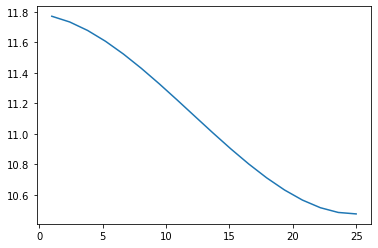

In [157]:
## code exploring the quadratic term
x = X_df_complete.WalcQuadTerm
y = X_df_complete["G3"]

mymodel = np.poly1d(np.polyfit(x, y, 3))

myline = np.linspace(x.min(), x.max(), y.max())

plt.plot(myline, mymodel(myline))
plt.show()

#### Question 1d

Form your training and test set. Explain why you do this.

In [158]:
## code making the training and test set
X_df_complete = X_df_complete[['Walc.x', 'Dalc', 'goout','G3']]
X= X_df_complete[['Walc.x']]
y = X_df_complete['G3']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

Here I have used the ‘train_test_split’ to split the data in 70:30 ratio i.e. 70% of the data will be used for training the model while 20% will be used for testing the model that is built out of it.

The train-test split is a technique for evaluating the performance of a machine learning algorithm.

It can be used for classification or regression problems and can be used for any supervised learning algorithm.

The procedure involves taking a dataset and dividing it into two subsets. The first subset is used to fit the model and is referred to as the training dataset. The second subset is not used to train the model; instead, the input element of the dataset is provided to the model, then predictions are made and compared to the expected values. This second dataset is referred to as the test dataset.

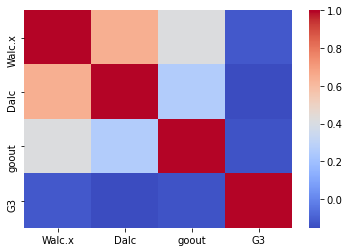

In [159]:
#Visualising the data using heatmap
plt.figure()
sns.heatmap(X_df_complete.corr(),cmap='coolwarm')
plt.show()

# *Intermezzo*

Note the nice formatting we have used in Question 1. It is expected of you to do the same for Questions 2-5. Because I do not know exactly what you will do in each of these questions, I have not provided a blueprint of the solutions formatting.

### Question 2: Regression

You will note that the dependent variable is continuous. Perform a regression analysis. (Also experiment with the interaction & quadratic terms, and report on what happens). Be complete!

### Linear regression

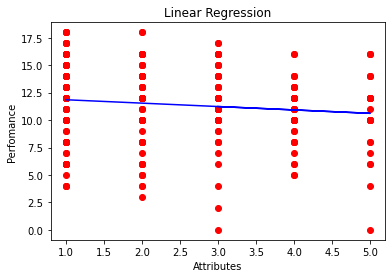

In [160]:
#Fit the model over the training dataset
model = LinearRegression()
model.fit(X,y)
# Visualizing the Linear Regression results
def viz_linear():
	plt.scatter(X, y, color='red')
	plt.plot(X, model.predict(X), color='blue')
	plt.title('Linear Regression')
	plt.xlabel('Attributes')
	plt.ylabel('Perfomance')
	plt.show()
	return
viz_linear()

In [161]:
#Calculate intercept and coefficient
model = LinearRegression()
model.fit(x_train,y_train)
print("Intercept (Beta 0): {}".format(model.intercept_))
print("Slope (Beta 1): {}".format(model.coef_[0]))

Intercept (Beta 0): 11.935315632619885
Slope (Beta 1): -0.22578569493362233


In [162]:
predictions=model.predict(x_test)

#### Model Evaluation

In [163]:
#Calculate root mean squared error to evaluate model performance
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,predictions)
print('MSE : ', mean_squared_error(y_test,predictions))

MSE :  11.280481651346081


In [164]:
print('The R2 score of the model on the test set is:', model.score(X, y))

The R2 score of the model on the test set is: 0.01319987581391302


#### Linear regression Explanation
In contrast to the amount of the test data, the mean squared error represents an approximate 11% and the Root Mean Square Error 1%. This goes to show that the model is reliable in the prediction of performance as lower the value is, the better the model’s performance.

#### Polynomial Regression

The R2 score of this model on the train set is: 0.012985859302238945


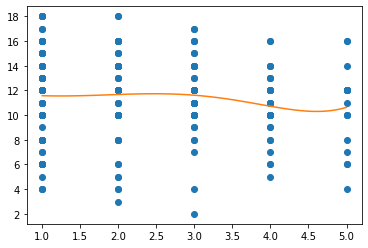

In [165]:
def poly_test(x):
	pol_exp = PolynomialFeatures(degree=x)
	model = LinearRegression()
	model.fit(pol_exp.fit_transform(x_train), y_train)
	print('The R2 score of this model on the train set is:', model.score(pol_exp.fit_transform(x_train), y_train))
	#plt.scatter(X_train, y_train)
	x = np.linspace(x_train.min(), x_train.max(), 100).reshape(-1,1)
	plt.plot(x_train, y_train, 'o')
	plt.plot(x, model.predict(pol_exp.fit_transform(x)))
	plt.show()

poly_test(5)

#### Polynomial Regression Explanation
The polynomial seems be more accurate as its predcition nears the most accuracy. However the deviation between the two models is a equal or less than 5 %. This is to suggest that although ther exists a slight difference, both should be equally reliable as they both house adequate predicitions. To test out this hypothesis, feel free to change the number "3" above.

### Question 3: Classification

Though we know that the dependent variable is continuous, this does not by any means mean that we can't perform a classification analysis. Encode the dependent variables into several categories you find logical (report which ones and why), and perform a classification analysis on this encoded variable. (Once again, don't be too fast to omit the interaction & quadratic terms). Be complete!

#### Logistic regression

In [166]:
#Depending on the the final grade G3, we categoize according to perfomance for the model
X_df_complete['final_grade'] = np.where(X_df_complete['G3'] >= 10, 1, 0)


<ipython-input-166-90c09ac6af35>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_df_complete['final_grade'] = np.where(X_df_complete['G3'] >= 10, 1, 0)


In [167]:
#Create new training testing set
X =  X_df_complete[['Walc.x', 'Dalc', 'goout']].values
y = X_df_complete['final_grade']
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)

#### Data Exploration

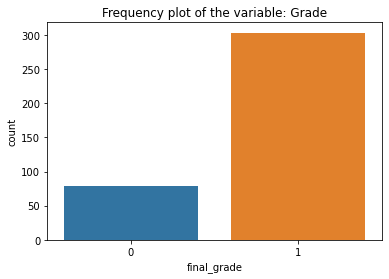

In [168]:
frequency = sns.countplot(x=X_df_complete["final_grade"], data=X_df_complete).set(title = "Frequency plot of the variable: Grade")

Logistic regression automatically comes with regularization so it is extremely important to scale the data, otherwise the coefficients of some features may be unfairly penalized.

In [169]:
#scaler object
scaler = StandardScaler()

# Fit the scale on dataset
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)


In [170]:
# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression(multi_class='auto', max_iter=10000)
logisticRegr.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=10000)

In [171]:
y_pred_class = logisticRegr.predict(X_test_scaled)

In [172]:
#Create class predictions (not predicted probabilities)
print(metrics.classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       0.78      1.00      0.88        75

    accuracy                           0.78        96
   macro avg       0.39      0.50      0.44        96
weighted avg       0.61      0.78      0.69        96



C:\Users\moses\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


It is important to note that the accuracy score is not particularly useful because there is a class imbalance in our data.

In [173]:
metrics.f1_score(y_test, y_pred_class)

0.8771929824561403

#### Logistsic Regression Explanation

From the model score above, it is safe to say that this model has a relatively high f1-score, which in turn translates to high accuracy in predciting G3 from the listed attributes Walc, Da

#### Decision Tree

In [174]:
tree = DecisionTreeClassifier()
tree_fit = tree.fit(x_train, y_train)
predictions = tree.predict(x_test)

#### Model Evaluation
#### Accuracy

In [175]:
score = tree_fit.score(x_test, y_test)
print(score)

0.7708333333333334


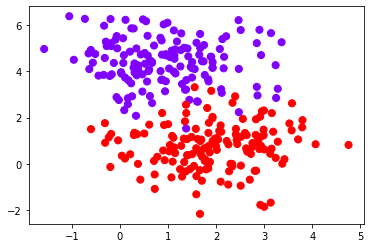

In [176]:
X, y = make_blobs(n_samples=300, centers=2,
				  random_state=0, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow');

The model, however showing a good score of 77%, might not be the best data model for this dataset. This comes from the fact that decision trees are "tests" on an attribute. Where each branch represents the outcome of the test, and each leaf node represents a class label.

The students data set has two binary outcomes in regards to classification, where a student has passed or not. The attributes that are available are not enough as more attributes are needed from the orginal dataset.

### K-Nearest Neighbours

In [177]:
import math

math.sqrt(len(y_test))

9.797958971132712

In [178]:
neighbour = KNeighborsClassifier(n_neighbors=9,p=2,metric='euclidean')
neighbour.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=9)

In [179]:
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score

y_pred =  neighbour.predict(x_test)
y_pred
print(f'F1_score : {f1_score(y_test,y_pred)}')
print(f'Acuracy score: {accuracy_score(y_test,y_pred)}')

F1_score : 0.8674698795180723
Acuracy score: 0.7708333333333334


Let’s plot the graph for the actual data and our predicted value.

C:\Users\moses\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\moses\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


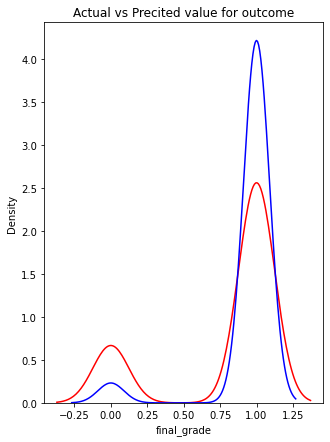

In [180]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 7))
ax = sns.distplot(X_df_complete['final_grade'], hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Predicted Values", ax=ax)
plt.title('Actual vs Precited value for outcome')
plt.show()
plt.close()

In regards to the differece between the actual vs predicted values, the model isn't as accurate in respect to the actual result. It would be highly inadvisable to continue or use this model to predict.

#### Classification models analysis
Upon classification anaysis, one can draw the conclusion that all of the models are more reliable in the case of predciting G3. After some iterations on the validity of the, i believe that logistic regression provided the best result for modelling predicitions.

### Question 4: Clustering

Now we have analysed the dataset in a supervised manner, let's try and investigate whether this supervised dimension indeed offers additional information. Perform a cluster analysis on the dependent variables, and compare your predictive power with the models you have made in Question 2 and 3. Be complete!

#### K Means Clustering

In [181]:
X_df_complete.drop(['Walc.x','final_grade'], axis=1, inplace=True)

C:\Users\moses\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [182]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
norm_mydata = X_df_complete.copy()
def minmaxscaler(x):
	for columnName, columnData in x.iteritems():
		x[columnName] = scaler.fit_transform(np.array(columnData).reshape(-1, 1))

minmaxscaler(norm_mydata)
norm_mydata.head()

,Dalc,goout,G3
0,0.00,0.25,0.666667
1,0.25,0.75,0.444444
2,0.00,0.00,0.666667
3,0.00,0.25,0.500000
4,0.25,0.00,0.666667


Text(0.5, 1.0, 'Elbow Curve to find optimum K')

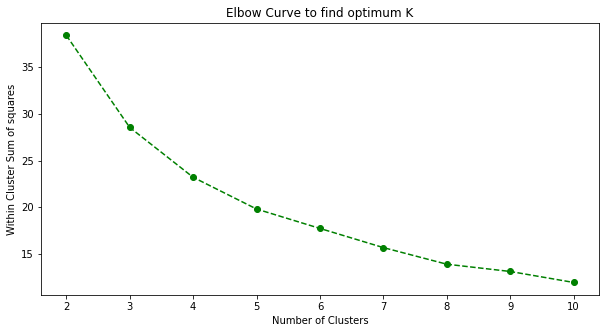

In [183]:
k = list(range(2,11))
sum_of_squared_distances = []
for i in k:
	kmeans = KMeans(n_clusters=i)
	kmeans.fit(norm_mydata)
	sum_of_squared_distances.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(k, sum_of_squared_distances, 'go--')
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum of squares')
plt.title('Elbow Curve to find optimum K')

In [184]:
# Instantiating
kmeans3 = KMeans(n_clusters = 3)
#remove all but goout, dalc, gout
# Training the model
kmeans3.fit(norm_mydata)

# predicting
y_pred = kmeans3.fit_predict(norm_mydata)

# Storing the y_pred values in a new column
X_df_complete['Cluster'] = y_pred + 1 #to start the cluster number from 1

<ipython-input-184-a739d7fbc11f>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_df_complete['Cluster'] = y_pred + 1 #to start the cluster number from 1


In [186]:
centroids = kmeans3.cluster_centers_
centroids = pd.DataFrame(centroids, columns=[ 'Dalc', 'goout','G3'])
centroids.index = np.arange(1, len(centroids)+1) # Start the index from 1
centroids

,Dalc,goout,G3
1,0.050847,0.347458,0.663606
2,0.675676,0.763514,0.579580
3,0.075688,0.839450,0.597350


<AxesSubplot:xlabel='goout', ylabel='G3'>

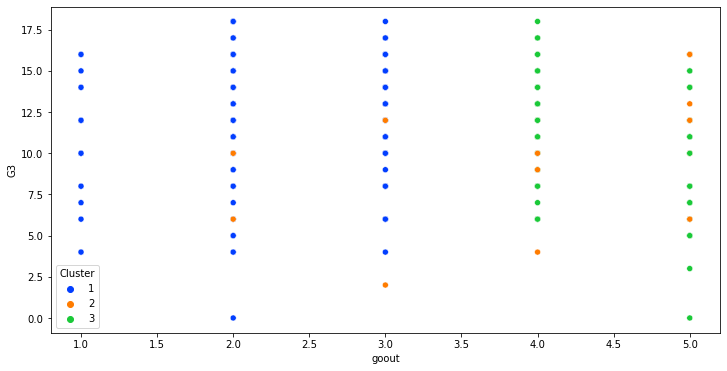

In [188]:
plt.figure(figsize=(12,6))
sns.set_palette("pastel")
sns.scatterplot(x=X_df_complete['goout'], y = X_df_complete['G3'], hue=X_df_complete['Cluster'], palette='bright')

This model is the most unreliable as the clusters are based on a single number. As seen above, the data represents itself in a straight line.

#### Overall Analysis

From an overall analysis, the best method for predicting performance falls under the models under classification. This stems from the result that the classification methods have the highest f1-score, which combines predcition and accuracy score. However the highest score, it falls under the predcition on G3 rather than a metric of who passed ot failed. To have numerical data, the best method would fall under regression.